## Итоговое задание по предмету 
## "Продвинутый Python"
### Выполнил: Шахманов Владислав Анатольевич
### Часть первая

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('movies_stats.csv')
data.head(1)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama


In [3]:
#1. В переменную years запишите список из всех годов с 1950-го по 2010-й.
years = [i for i in range(1950, 2011)]

In [4]:
#2. Напишите функцию production_year, которая каждой строке из названия фильма 
# выставляет год выпуска (год выпуска берём из столбца title). 
def production_year(row):
    if re.findall('\(\d\d\d\d\)', row['title']):
        if int(re.findall('\d\d\d\d', row['title'])[0]) in years:
            return int(re.findall('\d\d\d\d', row['title'])[0])
        else:
            return 1900
    else:
        return 1900

In [5]:
#3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’.
data['year'] = data.apply(production_year, axis=1)
data.head(3)

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996


In [6]:
#4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ 
# и отсортируйте результат по убыванию рейтинга.
grouped_data = data.groupby('year').rating.mean().reset_index()
grouped_and_sorted_data = grouped_data.sort_values('rating', ascending=False)
# Визуально оценив "взглядом" датафрейм видно, что рейтинг и правда ухудшается 
# с течением времени. Для более точной оценки и вывода построим график далее...
grouped_and_sorted_data.head(50)

,year,rating
8,1957,4.014241
23,1972,4.011136
3,1952,4.000000
25,1974,3.999058
5,1954,3.994220
2,1951,3.983539
13,1962,3.952446
1,1950,3.915254
28,1977,3.905786
15,1964,3.841492


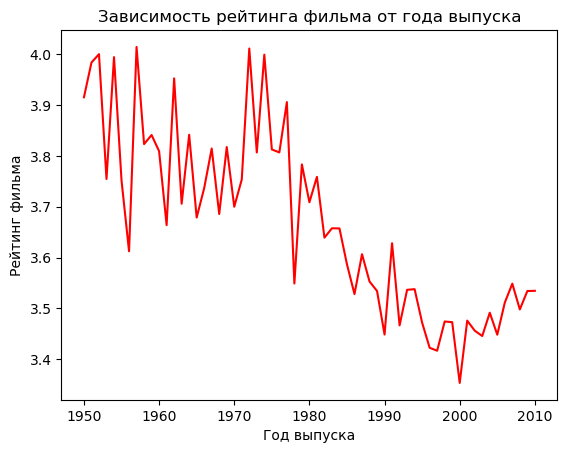

In [7]:
# Проверка гипотезы "с ростом года выпуска фильма средний рейтинг становится ниже"
grouped_and_sorted_data = grouped_and_sorted_data.sort_values('year', ascending=False)
grouped_and_sorted_data = grouped_and_sorted_data[
    grouped_and_sorted_data['year'] > 1900]
x = grouped_and_sorted_data['year']
y = grouped_and_sorted_data['rating']
plt.plot(x, y, color = 'red')
plt.title ("Зависимость рейтинга фильма от года выпуска")
plt.xlabel("Год выпуска")
plt.ylabel("Рейтинг фильма")
plt.show()

На данном этапе исследования гипотеза подтверждается, то есть действительно с ростом года выпуска средний рейтинг фильма становится ниже, что видно на графике.